# Análise de Desempenho do Aluno

Este conjunto de dados contém informações sobre o desempenho de alunos em um teste realizado com as matérias matemática, leitura e escrita incluindo suas pontuações e informações de genero e demais informações conforme descrito abaixo.

O foco desta análise é mostrar a sua distribuição e fazer alguns comparativos e correlação.  

## Dicionário de Dados


• **Genero:** O gênero do aluno - masculino (Male) / feminino (female)

• **Raça/etnia:** A origem racial ou étnica do aluno (Classificado por grupos, sendo do A ao E)

• **Nível de educação dos pais:** O nível mais alto de educação alcançado pelos pais ou responsáveis ​​do aluno 

|Descrição| Tradução|
|------|-------------|
|Some college| Possui alguma faculdade|
|High school | Ensino médio|
|Associate's degree | Graduação técnica |
|Some high school   | Ensino médio (completo ou não)  |
|Bachelor's degree  | Diploma de bacharel|
|Master's degree    | Diploma de mestrado|

• **Alimentação:** Se o aluno recebe almoço gratuito/ com preço reduzido ou se é preço padrão

• **Curso de preparação para teste:** se o aluno concluiu um curso de preparação para teste (completo/ não)

• **Pontuação de matemática:** a pontuação do aluno em um teste de matemática (Até 100 pontos)

• **Pontuação de leitura:** a pontuação do aluno em um teste de leitura (Até 100 pontos)

• **Pontuação de escrita:** a pontuação do aluno em um teste de escrita (Até 100 pontos)


Este conjunto de dados pode ser usado para várias questões de pesquisa relacionadas à educação, como examinar o impacto da educação parental ou cursos de preparação para testes no desempenho do aluno. Ele também pode ser usado para desenvolver modelos de aprendizado de máquina para prever o desempenho do aluno com base em fatores demográficos e outros.

Os dados utilizados foram do [**Keaggle**](https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics?resource=download)

## Importando Biliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando a base de dados

In [6]:
df = pd.read_csv('exams.csv')

## Visualização inicial dos dados

In [7]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77


## Renomeando as colunas para facilitar o entendimento dos dados

In [8]:
df.columns = ['Genero', 'Raca_Etnia', 'Nivel_Educacao_dos_Pais', 'Alimentacao', 'Curso_Preparatorio_Teste',
              'Pontos_Matematica', 'Pontos_Leitura', 'Pontos_Escrita']

In [9]:
df.head()

,Genero,Raca_Etnia,Nivel_Educacao_dos_Pais,Alimentacao,Curso_Preparatorio_Teste,Pontos_Matematica,Pontos_Leitura,Pontos_Escrita
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


## Informações sobre a base de dados

- A base possui 1.000 linhas e 8 coluna, as informações de pontuação já estão com o tipo no formato int, não sendo necessário ajustes e não possui dados nulos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Genero                    1000 non-null   object
 1   Raca_Etnia                1000 non-null   object
 2   Nivel_Educacao_dos_Pais   1000 non-null   object
 3   Alimentacao               1000 non-null   object
 4   Curso_Preparatorio_Teste  1000 non-null   object
 5   Pontos_Matematica         1000 non-null   int64 
 6   Pontos_Leitura            1000 non-null   int64 
 7   Pontos_Escrita            1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.describe()

,Pontos_Matematica,Pontos_Leitura,Pontos_Escrita
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


## Distribuição dos dados

A seguir será apresentado a distribuição dos dados

### Genero 

In [12]:
quantidade_genero = df['Genero'].value_counts()

In [13]:
percentual_genero = df['Genero'].value_counts(normalize = True)*100

In [14]:
distr_genero = pd.DataFrame({'Quantidade': quantidade_genero, 'Percentual (%)': percentual_genero})

### Comparativo Percentual Masculino e Feminino

- A distribuição dos dados por gênero é bem equilibrada, representando 50,8% para masculino e 49,2% para feminino

In [15]:
distr_genero

,Quantidade,Percentual (%)
Genero,,
male,508,50.8
female,492,49.2


### Raça/ Etnia (Grupos A, B, C, D e E)

In [16]:
quantidade_etnia = df['Raca_Etnia'].value_counts(ascending=False)

In [17]:
percentual_etnia = df['Raca_Etnia'].value_counts(normalize=True)*100

In [18]:
distr_etnia = pd.DataFrame({'Quantidade': quantidade_etnia, 'Percentual (%)': percentual_etnia})

### Comparativo Percentual Raça/ Etnia

- A maior parte dos alunos estão no grupo C e D. A soma de ambos representa quase 60% do total de alunos.

In [19]:
distr_etnia

,Quantidade,Percentual (%)
Raca_Etnia,,
group C,323,32.3
group D,257,25.7
group B,198,19.8
group E,143,14.3
group A,79,7.9


### Nível de Educação dos pais ou responsável

In [20]:
df.head()

,Genero,Raca_Etnia,Nivel_Educacao_dos_Pais,Alimentacao,Curso_Preparatorio_Teste,Pontos_Matematica,Pontos_Leitura,Pontos_Escrita
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


#### Traduzindo os dados da coluna Nível de Educação dos Pais para facilitar o entendimento

In [21]:
df['Nivel_Educacao_dos_Pais'] = df['Nivel_Educacao_dos_Pais'].replace({
    "associate's degree" : "Graduação técnica",
    "bachelor's degree" : "Diploma de bacharel",
    "high school" : "Ensino médio",
    "master's degree" : "Diploma de mestrado",
    "some college" : "Iniciou alguma faculdade",
    "some high school" : "Ensino médio (completo ou não)" 
})

In [22]:
df.head()

,Genero,Raca_Etnia,Nivel_Educacao_dos_Pais,Alimentacao,Curso_Preparatorio_Teste,Pontos_Matematica,Pontos_Leitura,Pontos_Escrita
0,female,group D,Iniciou alguma faculdade,standard,completed,59,70,78
1,male,group D,Graduação técnica,standard,none,96,93,87
2,female,group D,Iniciou alguma faculdade,free/reduced,none,57,76,77
3,male,group B,Iniciou alguma faculdade,free/reduced,none,70,70,63
4,female,group D,Graduação técnica,standard,none,83,85,86


In [23]:
quantidade_niveleduacacao = df['Nivel_Educacao_dos_Pais'].value_counts(ascending=False)

In [24]:
percentual_niveleduacacao = df['Nivel_Educacao_dos_Pais'].value_counts(normalize=True)*100

In [25]:
distr_niveleduacacao = pd.DataFrame({'Quantidade': quantidade_niveleduacacao, 'Percentual (%)':percentual_niveleduacacao})

### Comparativo Percentual Nível de Educação dos Pais

- A maioria dos pais ou responsáveis possui algum estudo, sendo representado por 22,4% para os que iniciaram alguma faculdade não necessáriamente terem concluido, seguido pelo ensino médio completo com uma taxa de 21,5%, graduação tecnica com 20,4%, ensino médio completo ou não representando 17,7%, os que possuem certificado de bacharel com 10,5% e a menor taxa, sendo 7,5% para os que possuem mestrado

In [26]:
distr_niveleduacacao

,Quantidade,Percentual (%)
Nivel_Educacao_dos_Pais,,
Iniciou alguma faculdade,224,22.4
Ensino médio,215,21.5
Graduação técnica,204,20.4
Ensino médio (completo ou não),177,17.7
Diploma de bacharel,105,10.5
Diploma de mestrado,75,7.5


### Pagamento padrão ou desconto/ gratuidade na alimentação

In [27]:
quantidade_alimentacao = df['Alimentacao'].value_counts(ascending=False)

In [28]:
percentual_alimentacao = df['Alimentacao'].value_counts(normalize=True)*100

In [29]:
distr_alimentacao = pd.DataFrame({'Quantidade': quantidade_alimentacao, 'Percentual (%)': percentual_alimentacao})

### Comparativo Percentual Pagamento Alimentação

- 66% dos alunos pagam o valor padrão para alimentação e 34% tem gratuidade ou algum desconto

In [30]:
distr_alimentacao

,Quantidade,Percentual (%)
Alimentacao,,
standard,660,66.0
free/reduced,340,34.0


### Curso Preparatório para realização do Exame

In [31]:
quantidade_cursoprep = df['Curso_Preparatorio_Teste'].value_counts(ascending=False)

In [32]:
percentual_cursoprep = df['Curso_Preparatorio_Teste'].value_counts(normalize=True)*100

In [33]:
distr_cursoprep = pd.DataFrame({'Quantidade': quantidade_cursoprep, 'Percentual (%)': percentual_cursoprep})

### Comparativo Percentual Alunos que realizaram o Curso Preparatório para realização do Teste

- Apenas 34,4% dos alunos fizeram exame preparatório para realização do exame, os demais não fizeram ou não completaram o curso

In [34]:
distr_cursoprep

,Quantidade,Percentual (%)
Curso_Preparatorio_Teste,,
none,656,65.6
completed,344,34.4


### Matriz de Correlação entre as Pontuações das Matérias

In [35]:
correla = df[['Pontos_Matematica','Pontos_Leitura', 'Pontos_Escrita']].corr()

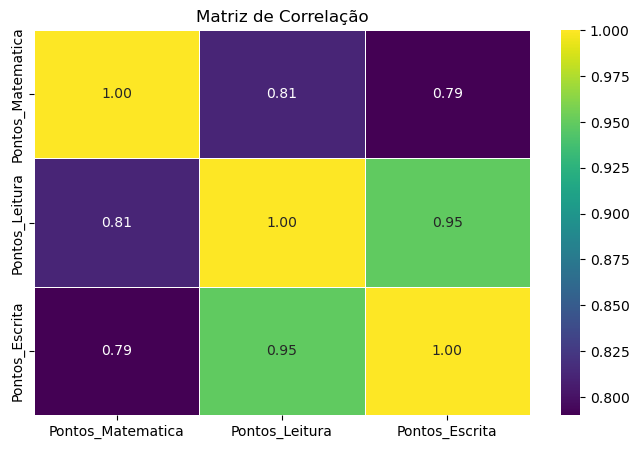

In [36]:
plt.figure(figsize=(8,5))
sns.heatmap(correla, annot=True, cmap='viridis', fmt='2.2f', linewidths=0.5)
plt.title('Matriz de Correlação')

plt.show()

Possível identificar pelo gráfico que a pontuação em leitura e escritas estão com uma taxa maior de correlação do que se comparado com a pontuação em matemática. Não significa que a pontuação maior entre leitura/escrita em uma causa o aumento na outra, mas que possuem uma correlação mais forte do que se comparado com a matéria de exatas.

- Leitura e Escrita = 0,95
- Leitura e Matemática = 0,81
- Escrita e Matemática = 0,79

### Influencia do Curso Preparatório para a Pontuação 

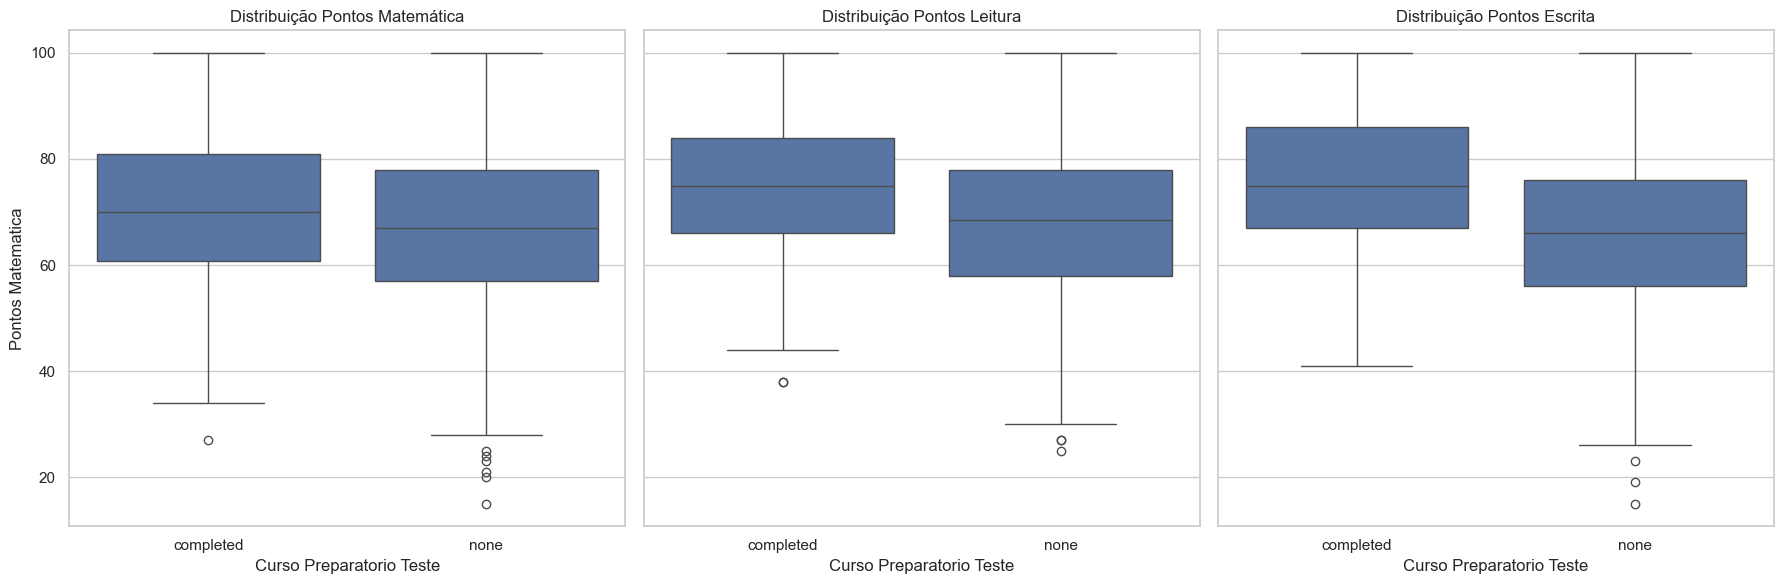

In [37]:
sns.set(style='whitegrid')

#Ajustando o quadro para adicionar os gráficos
fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=True)

#Boxplot para Pontos em Matemática
sns.boxplot(x= 'Curso_Preparatorio_Teste', y='Pontos_Matematica', data=df, ax=axes[0])
axes[0].set_title('Distribuição Pontos Matemática')
axes[0].set_xlabel('Curso Preparatorio Teste')
axes[0].set_ylabel('Pontos Matematica')

#Boxplot para Pontos em Leitura
sns.boxplot(x= 'Curso_Preparatorio_Teste', y='Pontos_Leitura', data=df, ax=axes[1])
axes[1].set_title('Distribuição Pontos Leitura')
axes[1].set_xlabel('Curso Preparatorio Teste')
axes[1].set_ylabel('Pontos Leitura')

#Boxplot para Pontos em Escrita
sns.boxplot(x= 'Curso_Preparatorio_Teste', y='Pontos_Escrita', data=df, ax=axes[2])
axes[2].set_title('Distribuição Pontos Escrita')
axes[2].set_xlabel('Curso Preparatorio Teste')
axes[2].set_ylabel('Pontos Escrita')

#Ajustando layout para não ter sobreposição dos gráficos
plt.tight_layout()

plt.show()

- Pela distribuição dos dados no gráfico é possível notar que quem completou o curso preparatório teve uma média de pontuação maior do que quem não completou.
- Para ficar ainda mais claro essa diferença, abaixo será demonstrado com mais detalhes a média de pontuação para cada matéria

### Média de pontuação dos alunos que fizeram o curso preparatório 

- Separação dos dados 

In [38]:
curso_pontos_comp = df[df['Curso_Preparatorio_Teste'] == 'completed']
curso_pontos_none = df[df['Curso_Preparatorio_Teste'] == 'none']

- Média de Pontos Matemática

In [39]:
media_mat_compl = curso_pontos_comp['Pontos_Matematica'].mean()
media_mat_none = curso_pontos_none['Pontos_Matematica'].mean()

- Média de Pontos Leitura

In [40]:
media_leit_compl = curso_pontos_comp['Pontos_Leitura'].mean()
media_leit_none = curso_pontos_none['Pontos_Leitura'].mean()

- Média de Pontos Escrita

In [41]:
media_esc_compl = curso_pontos_comp['Pontos_Escrita'].mean()
media_esc_none = curso_pontos_none['Pontos_Escrita'].mean()

- Criando um dicionário para montar um DataFrame com as médias

In [42]:
medias = {
    'Matéria': ['Matemática','Leitura', 'Escrita'],
    'Média_Nao_Completou': [round(media_mat_none), round(media_leit_none), round(media_esc_none)],
    'Média_Completou': [round(media_mat_compl), round(media_leit_compl), round(media_esc_compl)] 
}

In [43]:
df_medias = pd.DataFrame(medias)

- Adicionando uma coluna com o Percentual do aumento na média de pontuação

In [44]:
df_medias['Aumento_Percentual'] = ((df_medias['Média_Completou'] - df_medias['Média_Nao_Completou']) / df_medias['Média_Completou'])*100
df_medias['Aumento_Percentual'] = df_medias['Aumento_Percentual'].round(1)

In [45]:
df_medias = df_medias.sort_values(by='Aumento_Percentual', ascending=False)

### Percentual por Matéria entre as médias dos alunos que completara x não completaram o curso preparatório

In [46]:
df_medias

,Matéria,Média_Nao_Completou,Média_Completou,Aumento_Percentual
2,Escrita,66,76,13.2
1,Leitura,68,75,9.3
0,Matemática,66,70,5.7


- A média de Pontuação dos alunos que realizaram o curso preparatório foi maior do que os alunos que não realizaram.  
Sendo que para Escrita foi o maior resultado, sendo uma diferença de 13,2% acima na média de pontuação, seguido por Leitura com 9,3% e Matemática com 5,7%

### Comparação entre o nível de educação dos pais e pontuação dos alunos

In [47]:
nivel_educ_pais = df.copy()

In [48]:
media_nivel = nivel_educ_pais.groupby('Nivel_Educacao_dos_Pais').agg({
    'Pontos_Matematica' : 'mean',
    'Pontos_Leitura' : 'mean',
    'Pontos_Escrita' : 'mean'  
}).reset_index()

In [49]:
media_nivel

,Nivel_Educacao_dos_Pais,Pontos_Matematica,Pontos_Leitura,Pontos_Escrita
0,Diploma de bacharel,69.866667,71.819048,72.266667
1,Diploma de mestrado,71.026667,71.973333,71.746667
2,Ensino médio,65.381395,69.223256,66.772093
3,Ensino médio (completo ou não),64.197740,66.943503,65.293785
4,Graduação técnica,70.348039,72.647059,72.039216
5,Iniciou alguma faculdade,68.642857,70.941964,69.473214


In [50]:
media_nivel['Média_Geral_Pontos'] =  round(media_nivel[['Pontos_Matematica', 'Pontos_Leitura', 'Pontos_Escrita']].mean(axis=1),2)

In [51]:
media_nivel = round(media_nivel,2)

In [52]:
media_nivel.sort_values(by='Média_Geral_Pontos', ascending=True, inplace=True)
media_nivel

,Nivel_Educacao_dos_Pais,Pontos_Matematica,Pontos_Leitura,Pontos_Escrita,Média_Geral_Pontos
3,Ensino médio (completo ou não),64.20,66.94,65.29,65.48
2,Ensino médio,65.38,69.22,66.77,67.13
5,Iniciou alguma faculdade,68.64,70.94,69.47,69.69
0,Diploma de bacharel,69.87,71.82,72.27,71.32
1,Diploma de mestrado,71.03,71.97,71.75,71.58
4,Graduação técnica,70.35,72.65,72.04,71.68


In [53]:
# Criando as Labels para usar no gráfico

labels = ['Ensino Médio \nCompleto ou não',
          'Ensino Médio',
          'Iniciou alguma \nFaculdade',
          'Diploma \nBacharel',
          'Diploma \nMestrado',
          'Graduação \nTécnica'
          ]

In [54]:
# adicionando as cores nas variaveis

cinza_claro = "#CFCDCE"
cinza_medio = "#A2A1A3"
cinza_escuro = "#787878"
azul_claro = "8db7eb"
azul_escuro = "#253760"

In [55]:
# função para dar rótulo de dados no gráfico (números com as qtd)

def set_label_y_in_bar(bars):
    for bar in bars:
        height = bar.get_height()
        text_offset = height * 0.1
        ax.text(
            bar.get_x() + bar.get_width() / 2, 
            height - text_offset,
            f'{height:.0f}',
            ha='center',
            va='bottom',
            fontsize=9,
            color= 'white'
        )

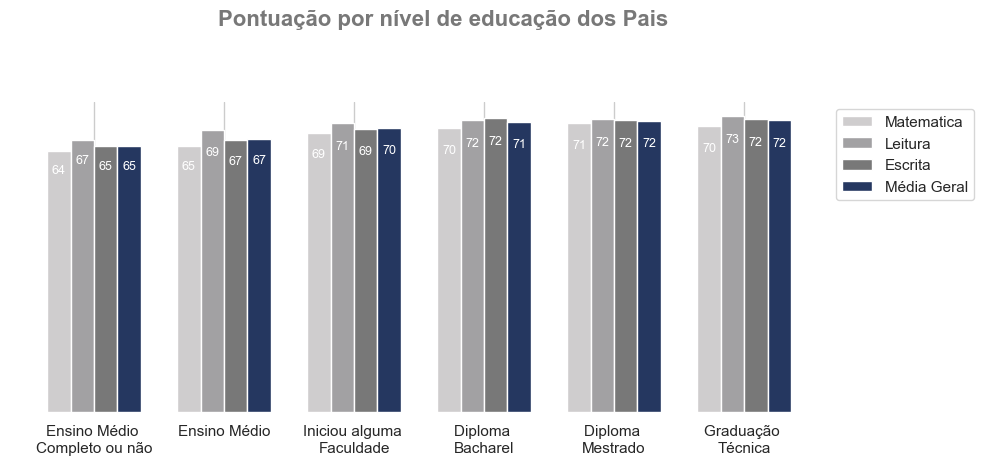

In [56]:
#Largura das barras e a posição
width_bar = 0.18
index = np.arange(len(media_nivel['Nivel_Educacao_dos_Pais']))

#criando figura e eixo para grafico de barras
fig, ax = plt.subplots(figsize=(10,5))

# Plotar as barras
bar_mat = ax.bar(index - 1.5 * width_bar, media_nivel['Pontos_Matematica'], width_bar, color = cinza_claro, label = 'Matematica')
bar_leit = ax.bar(index - 0.5 * width_bar, media_nivel['Pontos_Leitura'], width_bar, color = cinza_medio, label = 'Leitura')
bar_esc = ax.bar(index + 0.5 * width_bar, media_nivel['Pontos_Escrita'], width_bar, color = cinza_escuro, label = 'Escrita')
bar_media = ax.bar(index + 1.5 * width_bar, media_nivel['Média_Geral_Pontos'], width_bar, color = azul_escuro, label = 'Média Geral')

# Remover grids e eixos (usado uma lista com todos os lados, mas poderia passar um por vez
ax.spines[['right', 'left', 'top', 'bottom']].set_visible(False)

#Remover eixos
plt.gca().axes.get_yaxis().set_visible(False)
#plt.gca().axes.get_xaxis().set_visible(False) aqui está ficando com o grid

#labels do eixo
ax.set_xticks(index)
ax.set_xticklabels(labels)


# Titulo do gráfico
plt.text(x=0.95,
        y=95,
        s='Pontuação por nível de educação dos Pais',
        fontsize=16,
        color=cinza_escuro,
        weight='bold')


# Adicionando rótulo de dados (usando função)
set_label_y_in_bar(bar_mat)
set_label_y_in_bar(bar_leit)
set_label_y_in_bar(bar_esc)
set_label_y_in_bar(bar_media)


ax.legend(loc= 'upper left', bbox_to_anchor=(1,1))

#Ajuste layout
plt.tight_layout()

plt.show()

- É possível identificar que quanto maior o nível de educação dos pais maior foi a média de pontuação dos alunos.  
**Obs.** Não sigifica que o nível de educação dos pais seja a causa do aumento na pontuação, pois podem ter diversos fatores externos que podem influenciar neste resultado